In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

%matplotlib inline

In [2]:
df = pd.read_excel("Contracts.xlsx")
df.head()

,Item #,PO,Dept,Description,Professional / Consulting Services,Follow-on / Amendment,Amount,Vendor,Non-Competitive Rationale,Type,Year,Quarters
0,1,45082129,AG,Professional audit services for the Light Rail...,PE,NaN,50909.51,JENKINS RTS LLC\nSAN MARTIN CA,Section 22(1)(d)\nAbsence of competition for t...,FEDCO,2016,12
1,2,45082183,AG,Professional auditing services for the LRT Pla...,PE,NaN,59682.24,SAMSON & ASSOCIES CPA CONSULTATION\nGATINEAU QC,NaN,FEDCO,2016,12
2,3,45082677,AG,To provide professional auditing services for ...,PE,NaN,34630.20,PRICE WATERHOUSE COOPER LLP\nOTTAWA ON,NaN,FEDCO,2016,12
3,4,45064327,CCS,To provide off-site records storage and record...,NaN,A,610560.00,IRON MOUNTAIN CANADA OPERATION ULC\nTORONTO ON,NaN,FEDCO,2016,12
4,5,45069664,CCS,Supply of parking tickets for the handheld tic...,NaN,A,30157.09,PARKSMART INC\nMISSISSAUGA ON,NaN,FEDCO,2016,12


In [3]:
##### could we do a text analysis?
df_words = pd.DataFrame()
df_words['word_count'] = pd.Series(' '.join(df['Description']).lower().split()).value_counts()[:250]
df_words.reset_index()
df_words['words'] = df_words.index
df_words.index = pd.RangeIndex(len(df_words.index))
df_words['words'] = df_words.words.str.upper().str.strip()
df_words.head()

,word_count,words
0,4107,AND
1,3748,THE
2,3135,FOR
3,2829,TO
4,2195,SERVICES


In [4]:
#tokenize the strings
import nltk

df['tokenized_sentences'] = df.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
df['tokenized_words'] = df.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)

In [38]:
from nltk.corpus import stopwords
import string
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


df['token_descript'] = df['Description'].apply(text_process)
df_words['words2']  = df_words['words'].apply(text_process)
df_words['words3'] = df_words['words2'].map(lambda x: str(x)[1:-1])
#do it again to remove the quotes that appeared
df_words['words3'] = df_words['words3'].map(lambda x: str(x)[1:-1])

In [6]:
df_words['keep'] = np.where(df_words['words'] == df_words['words3'], 1,0)
df_words = df_words[df_words['keep'] == 1]
df_words

,word_count,words,words2,words3,keep
4,2195,SERVICES,[SERVICES],SERVICES,1
6,1441,PROFESSIONAL,[PROFESSIONAL],PROFESSIONAL,1
8,851,ENGINEERING,[ENGINEERING],ENGINEERING,1
9,813,PROVIDE,[PROVIDE],PROVIDE,1
10,765,SUPPLY,[SUPPLY],SUPPLY,1
11,700,UNDERTAKE,[UNDERTAKE],UNDERTAKE,1
12,585,DELIVER,[DELIVER],DELIVER,1
14,491,EQUIPMENT,[EQUIPMENT],EQUIPMENT,1
19,388,OFFER,[OFFER],OFFER,1
20,388,STANDING,[STANDING],STANDING,1


In [7]:
#create one giant string with all words from df
bigstr = df.Description.str.cat(sep=' ')
#then tokenize
clean_str = ' '.join([word for word in bigstr.split() if word.lower() not in stopwords.words('english')])
nopunc = ' '.join([char for char in clean_str if char not in string.punctuation])
tokens = ' '.join(nltk.word_tokenize(clean_str))
tokens

"Professional audit services Light Rail Transit project . Professional auditing services LRT Planning Change Management Program . provide professional auditing services Byward Parkdale Markets Audit . provide off-site records storage records center services . Supply parking tickets handheld ticket issuing devices leased Parksmart April June 2016 . Data Entry Processing Tickets Certificates Offence Certificates Parking Infraction City Clerk Solicitor . Print deliver City Ottawa snow sweeping signs Courthouse & Provincial Offence Services Branch , Print Shop . Professional services carry transcription services City Clerk & Solicitor 's office , requested basis 2016 . Temporary Placement Professional Resource , provide technical expertise support BIMS Software Upgrade project . Full service , maintenance toner services performance presses used Courthouse & Provincial Offence Services Branch . printing document management services City 's accounts payable cheques , notice fines due dates c

In [9]:
#vectorize for bag-of-wrods
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Description'])
messages_bow = bow_transformer.transform(df['Description'])

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [11]:
from wordcloud import WordCloud

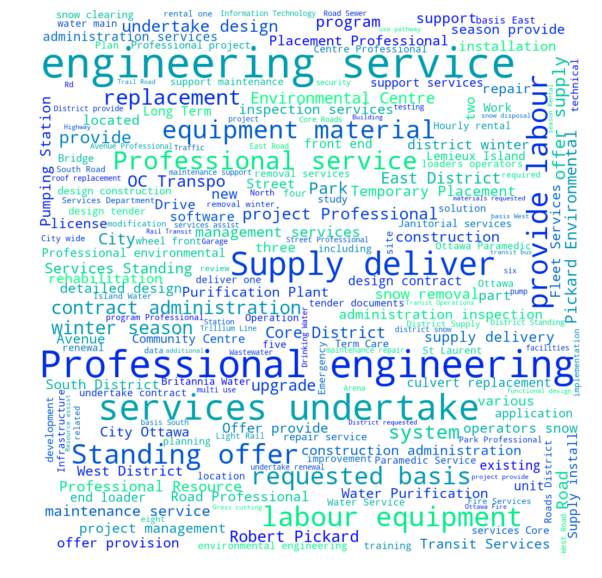

In [12]:
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white", colormap="winter").generate(tokens)
 
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [39]:
#let's make a custom stopwords list of words here that don't tell us anything and pop up frequently
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['services', 'professional', 'core', 'city', 'district','north','south','east','west',]
stopwords.extend(newStopWords)

In [16]:
#df['token_descript2'] = df['token_descript'].apply(text_process)

In [32]:
#create one giant string with all words from df
bigstr = df.Description.str.cat(sep=' ')
#then tokenize
clean_str = ' '.join([word for word in bigstr.split() if word.lower() not in stopwords])
nopunc = ' '.join([char for char in clean_str if char not in string.punctuation])
tokens = ' '.join(nltk.word_tokenize(clean_str))
tokens

"audit Light Rail Transit project . auditing LRT Planning Change Management Program . provide auditing Byward Parkdale Markets Audit . provide off-site records storage records center services . Supply parking tickets handheld ticket issuing devices leased Parksmart April June 2016 . Data Entry Processing Tickets Certificates Offence Certificates Parking Infraction Clerk Solicitor . Print deliver Ottawa snow sweeping signs Courthouse & Provincial Offence Branch , Print Shop . carry transcription Clerk & Solicitor 's office , requested basis 2016 . Temporary Placement Resource , provide technical expertise support BIMS Software Upgrade project . Full service , maintenance toner performance presses used Courthouse & Provincial Offence Branch . printing document management City 's accounts payable cheques , notice fines due dates courthouse Provincial Offences Act variable printing services , including warehousing supplying . Provide software enhancements customizations QTrak , hosted mail

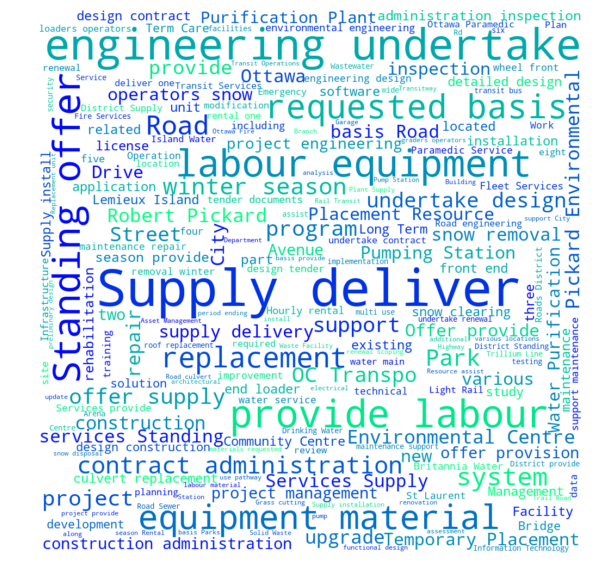

In [33]:
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white", colormap="winter").generate(tokens)
 
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [34]:
from collections import Counter

words = tokens.split(' ')
bigrams = zip(words, words[1:])
counts = Counter(bigrams)
print(counts.most_common(40))

[(('.', 'engineering'), 698), (('.', 'Supply'), 591), (('.', 'provide'), 550), (('engineering', 'undertake'), 507), (('.', 'Standing'), 380), (('Supply', 'deliver'), 363), (('provide', 'labour'), 349), (('labour', ','), 333), ((',', 'equipment'), 323), (('Services', '.'), 312), (('requested', 'basis'), 307), (('equipment', 'materials'), 251), (('Standing', 'offer'), 201), (('Standing', 'Offer'), 186), (('project', '.'), 144), (('Road', '.'), 143), (('winter', 'season'), 143), (('contract', 'administration'), 140), (('season', '.'), 140), ((')', '.'), 127), (('supply', 'deliver'), 127), (('basis', '.'), 124), (('.', 'undertake'), 122), (('District', '.'), 119), (('Centre', '.'), 114), (('undertake', 'design'), 111), (('OC', 'Transpo'), 110), (('.', 'Provide'), 103), (('Environmental', 'Centre'), 98), (('Pickard', 'Environmental'), 97), (('services', '.'), 91), (('design', ','), 87), (('Robert', 'O.'), 81), (('basis', 'Roads'), 81), (('2016/2017', 'winter'), 81), (('’', 's'), 80), (('.',

In [35]:
def find_ngrams(input_list, n):
  return zip(*(input_list[i:] for i in range(n)))

trigrams = find_ngrams(words, 3)
counts = Counter(trigrams)
print(counts.most_common(40))

[(('.', 'engineering', 'undertake'), 459), (('.', 'Supply', 'deliver'), 360), (('.', 'provide', 'labour'), 323), (('labour', ',', 'equipment'), 312), (('provide', 'labour', ','), 273), ((',', 'equipment', 'materials'), 251), (('.', 'Standing', 'offer'), 198), (('.', 'Standing', 'Offer'), 182), (('winter', 'season', '.'), 133), (('requested', 'basis', '.'), 118), (('engineering', 'undertake', 'design'), 95), (('Pickard', 'Environmental', 'Centre'), 93), (('requested', 'basis', 'Roads'), 81), (('2016/2017', 'winter', 'season'), 81), (('Robert', 'O.', 'Pickard'), 76), (('O.', 'Pickard', 'Environmental'), 74), (('(', '1', ')'), 73), (('provide', 'labour', 'equipment'), 72), (('.', 'Temporary', 'Placement'), 69), (('one', '(', '1'), 69), (('season', '.', 'provide'), 68), (('.', 'Supply', ','), 66), (('Standing', 'offer', 'supply'), 66), (('Standing', 'offer', 'provision'), 66), (('Services', '.', 'Supply'), 65), (('Standing', 'Offer', 'supply'), 64), (('Water', 'Purification', 'Plant'), 60)

In [65]:
#let's make some adjustments - first, I want to remove the common words that define the contract (i.e supply or deliver)
#let's make a custom stopwords list and add further
newStopWords = ['supply', 'deliver', 'provide', 'undertake', 'offer', 'design', 'support', 'requested']
stopwords.extend(newStopWords)
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [67]:
#create one giant string with all words from df
bigstr = df.Description.str.cat(sep=' ')
#then tokenize
nopunc = ''.join([char for char in bigstr if char not in string.punctuation])
nopunc = ''.join(nopunc)
clean_str = ' '.join([word for word in nopunc.split() if word.lower() not in stopwords])
tokens = ' '.join(nltk.word_tokenize(clean_str))
tokens

'audit Light Rail Transit project auditing LRT Planning Change Management Program auditing Byward Parkdale Markets Audit offsite records storage records center parking tickets handheld ticket issuing devices leased Parksmart April June 2016 Data Entry Processing Tickets Certificates Offence Certificates Parking Infraction Clerk Solicitor Print Ottawa snow sweeping signs Courthouse Provincial Offence Branch Print Shop carry transcription Clerk Solicitors office basis 2016 Temporary Placement Resource technical expertise BIMS Software Upgrade project Full service maintenance toner performance presses used Courthouse Provincial Offence Branch printing document management Citys accounts payable cheques notice fines due dates courthouse Provincial Offences Act variable printing including warehousing supplying software enhancements customizations QTrak hosted mail system including capacity read twodimensional barcodes detect location using global positioning system coordinates ticket process

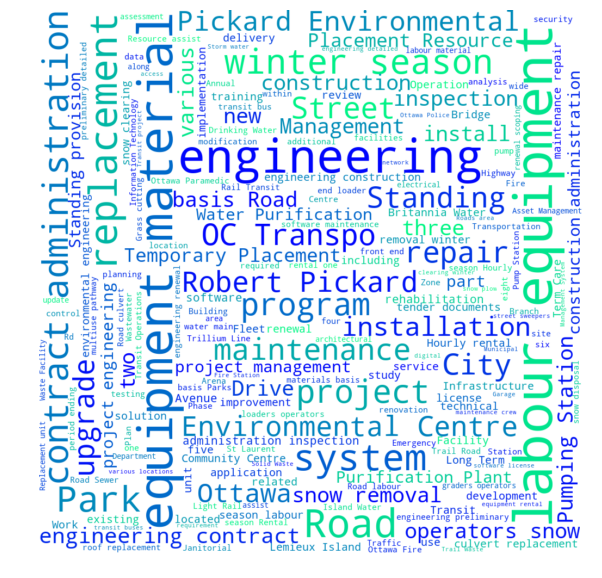

In [68]:
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0, background_color="white", colormap="winter").generate(tokens)
 
# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [69]:
words = tokens.split(' ')
bigrams = zip(words, words[1:])
counts = Counter(bigrams)
print(counts.most_common(40))

[(('labour', 'equipment'), 384), (('equipment', 'materials'), 256), (('winter', 'season'), 143), (('contract', 'administration'), 140), (('OC', 'Transpo'), 106), (('Robert', 'Pickard'), 100), (('Pickard', 'Environmental'), 97), (('Environmental', 'Centre'), 92), (('basis', 'Roads'), 81), (('20162017', 'winter'), 81), (('’', 's'), 80), (('engineering', 'contract'), 80), (('Temporary', 'Placement'), 74), (('Standing', 'provision'), 72), (('operators', 'snow'), 70), (('one', '1'), 68), (('snow', 'removal'), 67), (('Water', 'Purification'), 64), (('project', 'management'), 63), (('Purification', 'Plant'), 61), (('equipment', 'material'), 61), (('20172018', 'winter'), 60), (('administration', 'inspection'), 57), (('Placement', 'Resource'), 52), (('City', '’'), 51), (('construction', 'administration'), 51), (('Lemieux', 'Island'), 50), (('Community', 'Centre'), 50), (('two', '2'), 48), (('environmental', 'engineering'), 47), (('engineering', 'construction'), 44), (('season', 'labour'), 43), 

In [70]:
counts = Counter(words)
print(counts.most_common(40))

[('engineering', 816), ('Road', 510), ('equipment', 497), ('labour', 426), ('Standing', 387), ('materials', 373), ('basis', 315), ('maintenance', 288), ('project', 262), ('Ottawa', 259), ('Centre', 241), ('replacement', 239), ('Street', 228), ('Avenue', 222), ('administration', 201), ('Transit', 194), ('Roads', 186), ('winter', 177), ('snow', 173), ('various', 167), ('Park', 159), ('construction', 157), ('Management', 153), ('season', 152), ('one', 151), ('Environmental', 151), ('inspection', 145), ('contract', 143), ('Water', 138), ('management', 137), ('removal', 135), ('water', 133), ('operators', 130), ('Station', 123), ('Drive', 123), ('two', 117), ('Transpo', 116), ('system', 115), ('Project', 111), ('OC', 110)]


In [71]:
def find_ngrams(input_list, n):
  return zip(*(input_list[i:] for i in range(n)))

trigrams = find_ngrams(words, 3)
counts = Counter(trigrams)
print(counts.most_common(40))

[(('labour', 'equipment', 'materials'), 251), (('Robert', 'Pickard', 'Environmental'), 97), (('Pickard', 'Environmental', 'Centre'), 87), (('20162017', 'winter', 'season'), 81), (('engineering', 'contract', 'administration'), 80), (('labour', 'equipment', 'material'), 61), (('Water', 'Purification', 'Plant'), 60), (('20172018', 'winter', 'season'), 59), (('Temporary', 'Placement', 'Resource'), 52), (('City', '’', 's'), 51), (('contract', 'administration', 'inspection'), 47), (('winter', 'season', 'labour'), 41), (('season', 'labour', 'equipment'), 40), (('Long', 'Term', 'Care'), 37), (('operators', 'snow', 'clearing'), 35), (('loaders', 'operators', 'snow'), 34), (('Lemieux', 'Island', 'Water'), 32), (('Island', 'Water', 'Purification'), 32), (('Britannia', 'Water', 'Purification'), 32), (('Placement', 'Resource', 'assist'), 29), (('winter', 'season', 'Rental'), 29), (('Road', 'labour', 'equipment'), 28), (('Light', 'Rail', 'Transit'), 27), (('engineering', 'construction', 'administrat